<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum.

Text(0, 0.5, 'signal, arb.units')

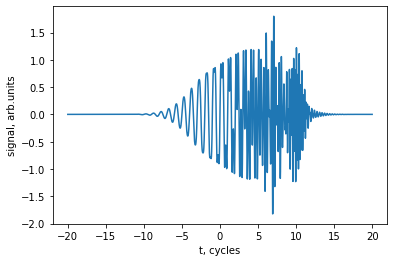

In [75]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

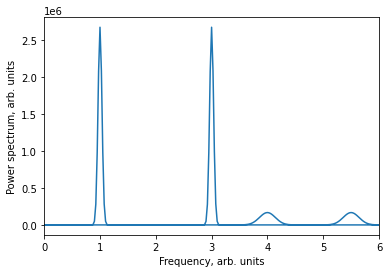

In [76]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

(0.0, 10.0)

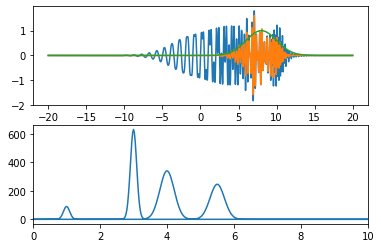

In [77]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=8*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

subplot(211)
plot(t/2/pi, y)
plot(t/2/pi, y_window)
plot(t/2/pi, window_function)

sp = fft.fft(y_window)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
subplot(212)
plot(w, abs(sp))
xlim(0, 10)
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

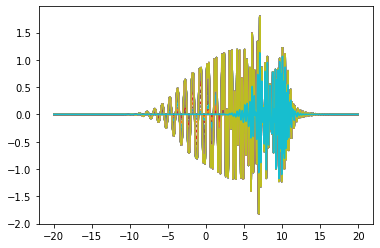

In [78]:
for i in range(-10,10,1):
  window_width=2.0*2*pi
  window_position=i*2*pi
  window_function=exp(-(t-window_position)**2/2/window_width**2)

  y_window=y * window_function

  plot(t/2/pi, y)
  plot(t/2/pi, y_window)

2. Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes

In [79]:
def get_specgram(nwindowsteps=10000):
  t_window = linspace(-20*2*pi, 20*2*pi, nwindowsteps)
  window_width=2.0*2*pi
  specgram = np.empty([len(t), len(t_window)])
  
  for n, t_w in enumerate(t_window):
    window_position = t_w
    window_function = exp(-(t-window_position)**2/2/window_width**2)
    y_window = y * window_function
    #plot(y_window)
    specgram[:,n] = abs(fft.fft(y_window))
  
  return specgram

In [80]:
# plot spectrogram, explain what you see
s = get_specgram(1000)

Text(0.5, 0, 't, cycles')

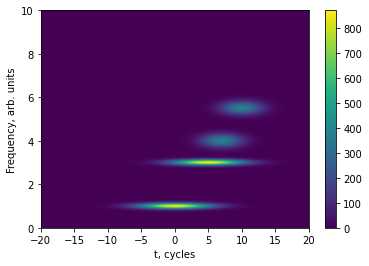

In [81]:
imshow(s, aspect='auto', origin='lower', extent=[min(t)/2/pi, max(t)/2/pi, w[0], 2 * w[int(len(t)/2)-1]])
colorbar()
ylim(0, 10)
ylabel('Frequency, arb. units')
xlabel('t, cycles') 

3.  Change the number of time steps in your signal to the power of 2 (i.e. $2^{14}$) and then slightly change the number of timesteps (i.e $2^{14} \pm 5$). Measure the timing, can you explain the difference? Write something as a possible explanation.

In [98]:
from timeit import default_timer as timer

for step in np.arange(-15,16,5):
  t=np.linspace(-20*2*pi, 20*2*pi, 2**14+step)
  y=np.sin(t)*exp(-t**2/2/20**2)
  y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
  y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
  y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
  start = timer()
  s = get_specgram(1000)
  end = timer()
  print("Step = {}, time = {} (s)".format(step, end - start))

Step = -15, time = 3.791476250999949 (s)
Step = -10, time = 3.810807144999899 (s)
Step = -5, time = 3.815507000000025 (s)
Step = 0, time = 1.142443731999947 (s)
Step = 5, time = 3.397295791000033 (s)
Step = 10, time = 3.341816665000124 (s)
Step = 15, time = 1.6530278609998277 (s)
